# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     897.7
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           8.23e-41
Time:                        20:14:47   Log-Likelihood:                 1.1884
No. Observations:                  50   AIC:                             5.623
Df Residuals:                      46   BIC:                             13.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1255      0.084     61.043      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.63679084  5.11458482  5.55278073  5.92373001  6.20976229  6.40608864
  6.52158836  6.57735011  6.60320714  6.63283574  6.69822235  6.82440825
  7.02537537  7.30174909  7.64069549  8.01802994  8.40219054  8.75942367
  9.05932962  9.27985717  9.41092651  9.45608539  9.43192619  9.36535983
  9.28919442  9.23674495  9.23635975  9.30676292  9.45397804  9.67033848
  9.93574704 10.22097783 10.49247803 10.71788051 10.87132165 10.93769068
 10.9151123  10.81525485 10.66141317 10.48468135 10.31884407 10.19482585
 10.13561026 10.15246377 10.24308471 10.39198142 10.57301748 10.75370588
 10.90054651 10.98453015]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.97381694 10.82951266 10.57151254 10.2451553   9.91012265  9.6258271
  9.43686574  9.36210133  9.39004396  9.48166427]


## Plot comparison

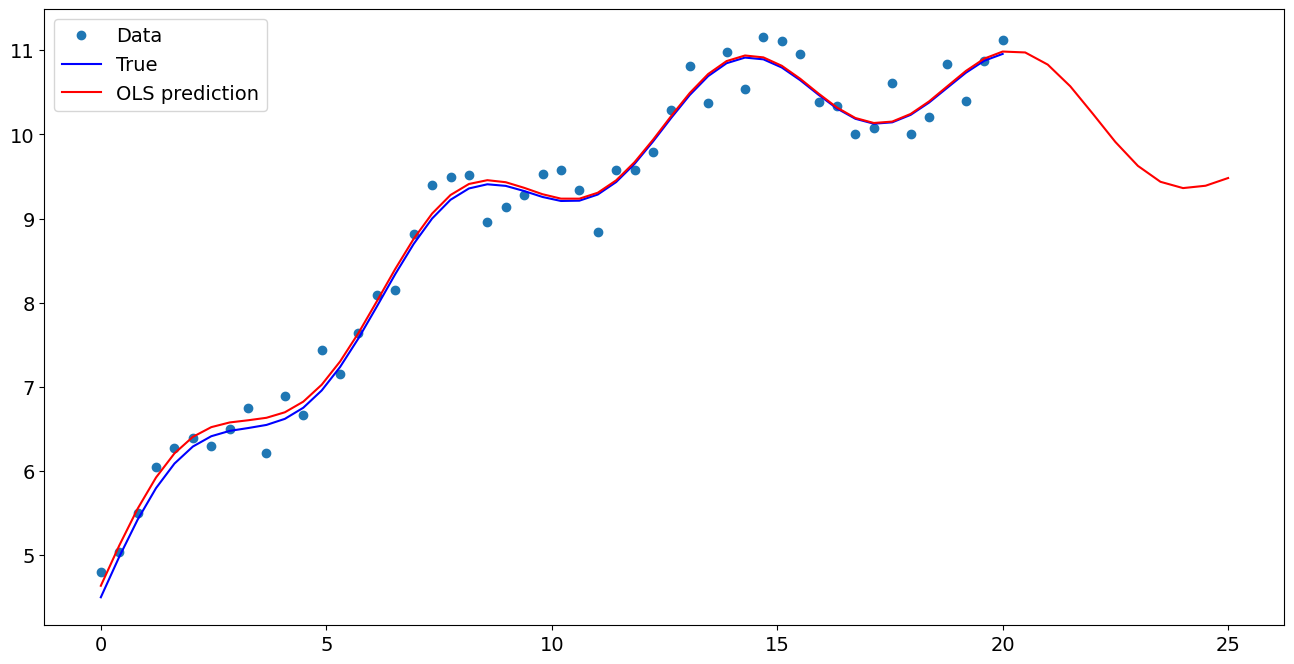

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.125533
x1                  0.489726
np.sin(x1)          0.507322
I((x1 - 5) ** 2)   -0.019550
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.973817
1    10.829513
2    10.571513
3    10.245155
4     9.910123
5     9.625827
6     9.436866
7     9.362101
8     9.390044
9     9.481664
dtype: float64